# Análise exploratória

### Banco de 2021

Mesmo com o relatório do pandas profiling, ainda há alguns aspectos da base que gostaria de testar.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_2021 = pd.read_csv('SRAG_2021.csv')

## Base de treino

In [3]:
df_2021.shape

(1078491, 54)

In [4]:
pd.options.display.float_format = "{:.2f}".format
df_2021.describe()

,tempo_alta_obito_final,FEBRE,TOSSE,DISPNEIA,DIARREIA,VOMITO,GARGANTA,DESC_RESP,SATURACAO,DOR_ABD,...,positivo_para1,positivo_para2,positivo_para3,positivo_para4,positivo_adeno,positivo_sars2,positivo_influenza,positivo_metap,positivo_boca,positivo_rino
count,1078491.00,1078491.00,1078491.00,1078491.00,1078491.00,1078491.00,1078491.00,1078491.00,1078491.00,1078491.00,...,1078491.00,1078491.00,1078491.00,1078491.00,1078491.00,1078491.00,1078491.00,1078491.00,1078491.00,1078491.00
mean,82.59,0.53,0.67,0.71,0.13,0.09,0.16,0.56,0.66,0.06,...,0.00,0.00,0.00,0.00,0.00,0.61,0.00,0.00,0.00,0.00
std,105.05,0.50,0.47,0.45,0.33,0.28,0.37,0.50,0.47,0.24,...,0.01,0.01,0.01,0.01,0.01,0.49,0.02,0.00,0.01,0.04
min,-999.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,18.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,60.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
75%,137.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
max,338.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [5]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078491 entries, 0 to 1078490
Data columns (total 54 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   tempo_alta_obito_final  1078491 non-null  float64
 1   FEBRE                   1078491 non-null  float64
 2   TOSSE                   1078491 non-null  float64
 3   DISPNEIA                1078491 non-null  float64
 4   DIARREIA                1078491 non-null  float64
 5   VOMITO                  1078491 non-null  float64
 6   GARGANTA                1078491 non-null  float64
 7   DESC_RESP               1078491 non-null  float64
 8   SATURACAO               1078491 non-null  float64
 9   DOR_ABD                 1078491 non-null  float64
 10  FADIGA                  1078491 non-null  float64
 11  PERD_OLFT               1078491 non-null  float64
 12  PERD_PALA               1078491 non-null  float64
 13  FATOR_RISC              1078491 non-null  int64  
 14  HE

Não há valores nulos na base.

#### Análise de categorias
Não irá funcionar para todas as variáveis, mas pode ser útil para as que possuem categorias.

In [6]:
pd.options.display.float_format = "{:.3f}".format
pd.set_option('display.max_rows', None)
for i in df_2021.columns:
    print(df_2021[i].value_counts(dropna=False))
    print()
    print(df_2021[i].value_counts(dropna=False, normalize=True))
    print("_"*100)
    
pd.reset_option('display.max_rows')

15.000      18758
13.000      18227
14.000      18175
16.000      17743
11.000      16995
12.000      16941
10.000      16843
9.000       15900
17.000      15845
8.000       15152
7.000       14912
18.000      14532
6.000       13540
19.000      13252
5.000       12934
20.000      12583
21.000      11837
4.000       11491
22.000      10804
23.000      10001
0.000        9740
3.000        9434
24.000       9090
30.000       9019
1.000        8979
31.000       8362
25.000       8300
43.000       8257
42.000       8143
44.000       8115
29.000       8028
45.000       7776
46.000       7560
26.000       7553
73.000       7518
74.000       7293
27.000       7254
72.000       7178
41.000       7092
75.000       7033
47.000       6955
32.000       6892
28.000       6745
2.000        6726
40.000       6709
71.000       6657
76.000       6499
103.000      6307
39.000       6297
70.000       6276
48.000       6013
104.000      5965
101.000      5905
102.000      5888
77.000       5805
38.000    

Name: GARGANTA, dtype: float64
____________________________________________________________________________________________________
1.000    607637
0.000    470854
Name: DESC_RESP, dtype: int64

1.000   0.563
0.000   0.437
Name: DESC_RESP, dtype: float64
____________________________________________________________________________________________________
1.000    708825
0.000    369666
Name: SATURACAO, dtype: int64

1.000   0.657
0.000   0.343
Name: SATURACAO, dtype: float64
____________________________________________________________________________________________________
0.000    1011724
1.000      66767
Name: DOR_ABD, dtype: int64

0.000   0.938
1.000   0.062
Name: DOR_ABD, dtype: float64
____________________________________________________________________________________________________
0.000    797648
1.000    280843
Name: FADIGA, dtype: int64

0.000   0.740
1.000   0.260
Name: FADIGA, dtype: float64
_________________________________________________________________________________

M    594568
F    483923
Name: CS_SEXO, dtype: int64

M   0.551
F   0.449
Name: CS_SEXO, dtype: float64
____________________________________________________________________________________________________
0    1069223
1       9268
Name: gravidez, dtype: int64

0   0.991
1   0.009
Name: gravidez, dtype: float64
____________________________________________________________________________________________________
Branca      477786
Parda       367406
Ignorado    176138
Preta        45888
Amarela       9688
Indigena      1585
Name: raca, dtype: int64

Branca     0.443
Parda      0.341
Ignorado   0.163
Preta      0.043
Amarela    0.009
Indigena   0.001
Name: raca, dtype: float64
____________________________________________________________________________________________________
0    991462
1     87029
Name: vacina_gripe, dtype: int64

0   0.919
1   0.081
Name: vacina_gripe, dtype: float64
____________________________________________________________________________________________________
0   

### É possível observar que:

### Data

`Tempo de alta`
* 25% da base é liberada em até 18 dias.
* 50% da base é liberada ou vai a óbito em até 60 dias;
* 75% da base é liberada ou vai a óbito em até 137 dias.
* O maior valor é 338 dias, o que pode ser um erro da base.
* Pequena diferença com relação a base de 2020

### Sintomas

`FEBRE`
* 52,9% da base apresentaram febre

`TOSSE`
* 66,7% da base apresentaram tosse

`DISPNEIA (falta de ar)`
* 71,2% da base apresentaram dificuldade para respirar

`DIARREIA`
* 12,7% da base apresentaram diarreia

`VOMITO`
* 8,5% da base apresentaram diarreia

`GARGANTA`
* 16,3% da base apresentaram dor de garganta

`DESCONFORTO RESPIRATÓRIO`
* 43,7% da base apresenta desconforto respiratório

`SATURAÇÃO (abaixo de 95%)`
* 65,7% dos pacientes apresentaram saturação abaixo de 95%

`DOR ABDOMINAL`
* 6,2% dos pacientes apresentaram dor abdominal

`FADIGA`
* 26% dos pacientes apresentaram fadiga

`PERDA OLFATIVA`
* 9% dos pacientes apresentaram perda olfativa

`PERDA DE PALADAR`
* 9,2% dos pacientes apresentaram perda de paladar

**Observações gerais**:
* Os 3 sintomas mais comuns são Dispneia (falta de ar), Tosse e Baixa saturação
* Os 3 sintomas menos comuns são: Dor abdominal, Vômito e Perda olfativa
* Nota-se que as proporções dos sintomas são semelhantes a 2020. Fadiga teve um aumento de 15%.

### Morbidades

`FATOR DE RISCO`
* 57,4% dos pacientes possuem algum fator de risco para SRAG

`HEMATOLÓGICO`
* 0,6% da base apresenta algum fator hematológico

`CARDIOPATIA`
* 28,5% dos pacientes possuem alguma cardiopatia

`ASMA`
* 2,7% dos pacientes possuem asma

`DIABETES`
* 19,7% dos pacientes têm diabetes

`PNEUMOPATIA`
* 2,9% dos pacientes possuem alguma pneumopatia

`RENAL`
* 2,8% dos pacientes possuem alguma condição renal 

`IMUNODEPRESSÃO`
* 2,0% dos pacientes são imunodeprimidos

`HEPÁTICA`
* 0,7% dos pacientes relataram condição hepática

`NEUROLÓGICA`
* 3,1% dos pacientes relatam condição neurológica

`OBESIDADE`
* 8,8% dos pacientes são obesos

`PUÉRPERA (que acabou de dar a luz)`
* 0,3% dos pacientes são puérperas

`SÍNDROME DE DOWN`
* 0,3% dos pacientes possuem síndrome de down

**Observações gerais**
* A morbidade mais observada nos pacientes de SRAG é a Cardiopatia
* A morbidade menos comum, além das mulheres puérperas é a hepática.
* Nota-se que as proporções das morbidades são semelhantes a 2020.

### Demográficos

`IDADE`
* Os top 15 pacientes com SRAG possuem 52 anos ou mais. A doença parece ser mais comum em pessoas mais velhas a partir de 2020 e a tendência se mantém em 2021
* 25% da base possui até 43 anos de idade
* 50% da base possui até 56 anos de idade
* 75% da base possui até 69 anos de idade

`SEXO`
* 55,1% da base é formada por homens
* 44,9% da base é formada por mulheres

`Gravidez`
* 0,9% da base está grávida

`RAÇA`
* 44,3% da base se declara como branco
* 34,1% da base se declara como pardo
* Apenas 0,1% é indígena

`VACINA DA GRIPE`
* 8,1% da base é vacinado contra gripe

`MÃE AMAMENTA`
* 1,1% da base possui mãe que amamenta. Este 1% se trata de bebês

`MÃE VACINADA CONTRA GRIPE`
* 0,1% da base possui mãe vacinada contra gripe. Isto se aplica a bebês de até 6 meses

`VACINA DA COVID-19` **Variável nova em 2021 em comparação com 2020**
* 11,6% da base foi vacinada contra COVID-19

**Observações gerais**
* A base ficou mais velha em comparação com os anos de 2013 a 2018
* A proporção das idades se mantém semelhante a 2020
* A distribuição de homem e mulher ficou em 55% de homens e 45% de mulheres
* Poucas pessoas se vacinaram contra a gripe

### Doença e Diagnóstico

`EVOLUÇÃO (variável resposta)`
* 33,8% da base foi a óbito

`DIAGNÓSTICO FINAL`
* 81,8% da base teve SRAG por conta da COVID-19 -- **19,7% a mais pra 2020**
* 17,2% da base apresentou SRAG por causa desconhecida **19,8% a menos pra 2020**
* 0,9% da base teve SRAG por conta do vírus Influenza
* 0,1% da base teve SRAG por conta de outro vírus

`SURTO SÍNDROME GRIPAL **(ver eliminação)**`
* 3,3% da base se trata de caso proveniente de surto de SG que evoluiu para SRAG

`NOSOCOMIAL`
* 1,5% da base apresenta caso de SRAG com infecção adquirida após internação.

`CONTATO COM AVES OU SUÍNOS`
* 0,9% da base teve contato com aves e/ou suínos

`ANTIVIRAL`
* 2,7% da base fez uso de antiviral como tratamento -- **13,3% a menos pra 2020**

`SUPORTE VENTILATÓRIO`
* 18,3% da base precisou de suporte ventilatório INVASIVO
* 52,3% da base precisou de suporte ventilatório NÃO-INVASIVO
* 29,4% da base não precisou de suporte ventilatório

`UTI`
* 31,5% da base precisou ir para a UTI para acompanhamento do caso

`POSITIVO PARA Sars-CoV-2`
* 61,3% da base foi positiva para Sars-CoV-2

`POSITIVO PARA ADENOVÍRUS`
* 0,022% da base foi positiva para adenovírus

`POSITIVO PARA INFLUENZA`
* 0,27% da base foi positiva para Influenza A

`POSITIVO PARA PARAINFLUENZA 1`
* 0,008% da base foi positiva para Parainfluenza 1

`POSITIVO PARA PARAINFLUENZA 2`
* 0,005% da base foi positiva para Parainfluenza 2

`POSITIVO PARA PARAINFLUENZA 3`
* 0,005% da base foi positiva para Parainfluenza 3

`POSITIVO PARA PARAINFLUENZA 4`
* 0,003% da base foi positiva para Parainfluenza 4

`POSITIVO PARA METAPNEUMOVÍRUS`
* 0,001% da base foi positiva para Metapneumovírus

`POSITIVO PARA BOCAVÍRUS`
* 0,017% da base foi positiva para Bocavirus

`POSITIVO PARA VSR`
* 0,5% da base foi positiva para VSR

`POSITIVO PARA RINOVÍRUS`
* 0,2% da base foi positiva para Rinovírus


**Observações gerais**
* Em comparação com a base de 2013 a 2018, é possível observar uma forte prevalência do Sars-CoV-2 frente aos outros vírus. O Influenza que era o mais comum anteriormente, hoje representa só 0,2% da base.
* Proporcionalmente, uma menor porcentagem da base precisou de suporte ventilatório invasivo.
* Proporcionalmente tivemos mais óbitos em 2020, 30,7% contra 13,8% de 2013 a 2018. Agora, 33,8% em 2021.
* Proporcionalmente quase a mesma porcentagem de pessoas foi para a UTI.

### Análise gráfica das variáveis numéricas

#### Tempo de alta ou óbito

In [7]:
import matplotlib.pyplot as plt

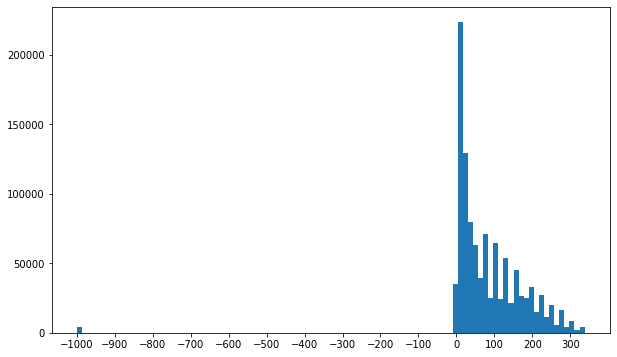

In [8]:
plt.figure(figsize=(10,6))
plt.hist(df_2021.tempo_alta_obito_final, bins = 100)
plt.xticks(np.arange(-1000, max(df_2021.tempo_alta_obito_final)+1, 100))
plt.show()

Observamos que a grande maioria das pessoas fica entre 0 e 50 dias para o encerramento do  atendimento.

Neste banco temos menos outliers.

#### Idade

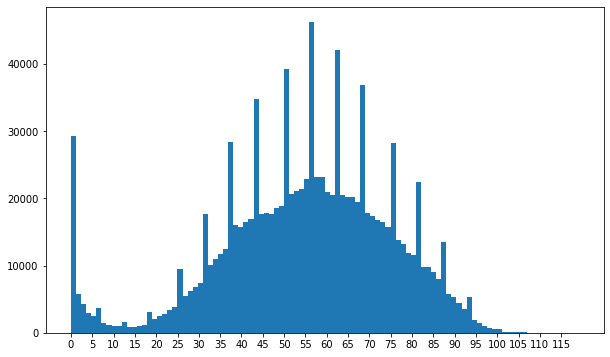

In [9]:
plt.figure(figsize=(10,6))
plt.hist(df_2021.idade_trat, bins = 100)
plt.xticks(np.arange(0, max(df_2021.idade_trat)+1, 5))
plt.show()

É possível observar que há muitos pacientes crianças, porém há também muitas pessoas entre 35 e 80 anos, onde há um aumento significativo do número de casos.

O gráfico é semelhante ao de 2020.

#### Gráfico de Idade x Alta

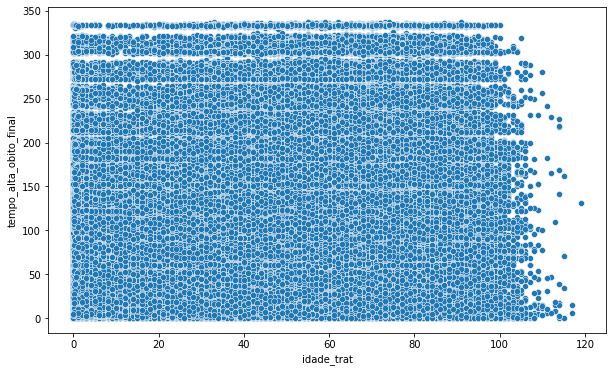

In [10]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'idade_trat', y = 'tempo_alta_obito_final', data = df_2021[df_2021.tempo_alta_obito_final != -999])
plt.show()

Não é possível identificar uma tendência do tempo de alta com relação a idade do paciente.

## Análise bivariada com relação a variável resposta

In [11]:
numericas = ['tempo_alta_obito_final', 'idade_tratada']
categoricas = df_2021.columns
categoricas = [i for i in categoricas if i not in numericas]

### Análise das variáveis numéricas

#### Tempo de alta

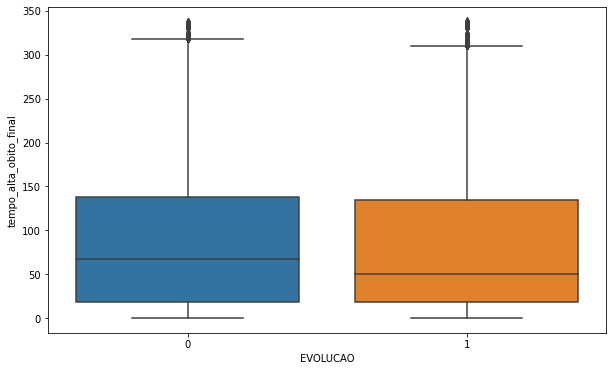

In [12]:
import seaborn as sns

plt.figure(figsize = (10,6))
sns.boxplot(data = df_2021[df_2021.tempo_alta_obito_final != -999], x = 'EVOLUCAO', y = 'tempo_alta_obito_final')
plt.show()

É possível observar que ,
* As categorias 0 e 1 são semelhantes quando analisadas com o tempo de alta ou óbito. 
* A mediana dos que falecem é menor que a dos que recebem alta

In [13]:
pd.set_option('display.max_rows', None)
pd.crosstab(df_2021.tempo_alta_obito_final, df_2021.EVOLUCAO, margins = True).sort_values(by = 'All', ascending = False)

EVOLUCAO,0,1,All
tempo_alta_obito_final,,,
All,713865,364626,1078491
15.0,13973,4785,18758
13.0,13462,4765,18227
14.0,13431,4744,18175
16.0,13098,4645,17743
11.0,11941,5054,16995
12.0,12127,4814,16941
10.0,11311,5532,16843
9.0,10609,5291,15900


In [14]:
pd.crosstab(df_2021.tempo_alta_obito_final, df_2021.EVOLUCAO, margins = True, normalize = True).sort_values(by = 'All', ascending = False)

EVOLUCAO,0,1,All
tempo_alta_obito_final,,,
All,0.662,0.338,1.000
15.0,0.013,0.004,0.017
13.0,0.012,0.004,0.017
14.0,0.012,0.004,0.017
16.0,0.012,0.004,0.016
11.0,0.011,0.005,0.016
12.0,0.011,0.004,0.016
10.0,0.010,0.005,0.016
9.0,0.010,0.005,0.015


In [15]:
pd.crosstab(df_2021.tempo_alta_obito_final, df_2021.EVOLUCAO, margins = True).sort_values(by = 1, ascending = False)

EVOLUCAO,0,1,All
tempo_alta_obito_final,,,
All,713865,364626,1078491
0.0,1361,8379,9740
10.0,11311,5532,16843
9.0,10609,5291,15900
7.0,9771,5141,14912
11.0,11941,5054,16995
8.0,10194,4958,15152
1.0,4075,4904,8979
12.0,12127,4814,16941


É possível observar que:

* O tempo de alta/óbito com mais amostragem é o de 15 dias. O total desse tempo representa 1,7% da base;
* Grande parte da base é liberada ou vai a óbito em menos de 30 dias;
* O tempo com mais óbitos é o de 0 dias, muitos pacientes falecem pouco tempo depois de dar entrada na UPA;
* Os períodos de atendimento com mais óbitos estão entre 8 e 17 dias (top 10).

#### Idade

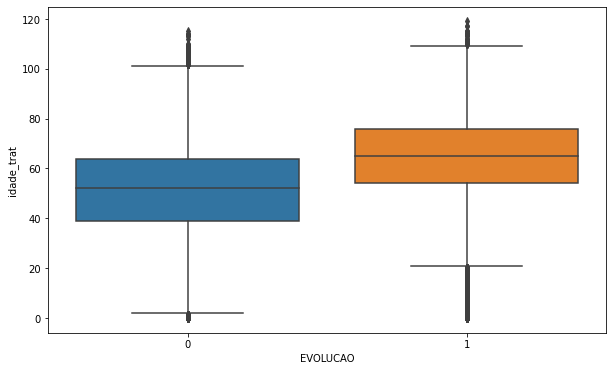

In [16]:
import seaborn as sns

plt.figure(figsize = (10,6))
sns.boxplot(data = df_2021, x = 'EVOLUCAO', y = 'idade_trat')
plt.show()

É possível observar que
* Há muitas altas de pacientes entre 40 e 65 anos
* 25% das pessoas que obtiveram alta tem até 40 ano de idade;
* A mediana de alta gira em torno dos 53 anos de idade;
* 75% da base que recebeu alta tem até 65 anos de idade;


* Os óbitos são predominantes entre 60 e 80 anos;
* 25% da base que foi a óbito possui até 60 anos;
* A mediana dos óbitos gira em torno dos 65 anos;
* 75% dos pacientes que foram a óbito possuem até 80 anos;

In [17]:
pd.crosstab(df_2021.idade_trat, df_2021.EVOLUCAO, margins = True).sort_values(by = 'All', ascending = False)

EVOLUCAO,0,1,All
idade_trat,,,
All,713865,364626,1078491
57.0,15572,7943,23515
58.0,15301,7944,23245
59.0,14973,8244,23217
55.0,15716,7111,22827
56.0,15514,7183,22697
54.0,15144,6255,21399
53.0,15006,6117,21123
63.0,12476,8540,21016


In [18]:
pd.crosstab(df_2021.idade_trat, df_2021.EVOLUCAO, margins = True).sort_values(by = 1, ascending = False)

EVOLUCAO,0,1,All
idade_trat,,,
All,713865,364626,1078491
66.0,11154,9001,20155
68.0,10110,8915,19025
67.0,10686,8736,19422
65.0,11462,8726,20188
70.0,9227,8635,17862
63.0,12476,8540,21016
64.0,12030,8517,20547
69.0,9413,8464,17877


É possível observar que:
* Em comparação com a base de 2013 a 2018, há uma mudança nas idades que mais aparecem. Anteriormente, os que mais apareciam eram crianças de até 5 anos, hoje, os que mais aparecem tem mais de 60 anos. Em 2021 esse caráter de 2020 se mantém.
* A idade com mais óbitos é a de 66 anos de idade.

In [19]:
pd.reset_option('display.max_rows')

### Análise das variáveis categoricas

Vou analisar todas as variáveis através de um loop e comentá-las como feito anteriormente.

In [20]:
for i in df_2021[categoricas].columns:
    print('------------------', i, '------------------')
    print()
    print('                  EVOLUCAO')
    print(pd.crosstab(df_2021[i], df_2021.EVOLUCAO, margins =  True).to_markdown())
    print()
    print('                  EVOLUCAO')
    print(pd.crosstab(df_2021[i], df_2021.EVOLUCAO, margins =  True, normalize = True).to_markdown())
    print()
    print('                  EVOLUCAO')
    print(pd.crosstab(df_2021[i], df_2021.EVOLUCAO, normalize = 'index').to_markdown())
    print()
    print('                  EVOLUCAO')
    print(pd.crosstab(df_2021[i], df_2021.EVOLUCAO, normalize = 'columns').to_markdown())
    print("_"*100)

------------------ FEBRE ------------------

                  EVOLUCAO
| FEBRE   |      0 |      1 |              All |
|:--------|-------:|-------:|-----------------:|
| 0.0     | 320681 | 187727 | 508408           |
| 1.0     | 393184 | 176899 | 570083           |
| All     | 713865 | 364626 |      1.07849e+06 |

                  EVOLUCAO
| FEBRE   |        0 |        1 |      All |
|:--------|---------:|---------:|---------:|
| 0.0     | 0.297342 | 0.174065 | 0.471407 |
| 1.0     | 0.364569 | 0.164025 | 0.528593 |
| All     | 0.661911 | 0.338089 | 1        |

                  EVOLUCAO
|   FEBRE |        0 |        1 |
|--------:|---------:|---------:|
|       0 | 0.630755 | 0.369245 |
|       1 | 0.689696 | 0.310304 |

                  EVOLUCAO
|   FEBRE |        0 |        1 |
|--------:|---------:|---------:|
|       0 | 0.449218 | 0.514848 |
|       1 | 0.550782 | 0.485152 |
____________________________________________________________________________________________________
-

| DOR_ABD   |      0 |      1 |             All |
|:----------|-------:|-------:|----------------:|
| 0.0       | 666894 | 344830 |     1.01172e+06 |
| 1.0       |  46971 |  19796 | 66767           |
| All       | 713865 | 364626 |     1.07849e+06 |

                  EVOLUCAO
| DOR_ABD   |         0 |         1 |       All |
|:----------|----------:|----------:|----------:|
| 0.0       | 0.618358  | 0.319734  | 0.938092  |
| 1.0       | 0.0435525 | 0.0183553 | 0.0619078 |
| All       | 0.661911  | 0.338089  | 1         |

                  EVOLUCAO
|   DOR_ABD |        0 |        1 |
|----------:|---------:|---------:|
|         0 | 0.659166 | 0.340834 |
|         1 | 0.703506 | 0.296494 |

                  EVOLUCAO
|   DOR_ABD |         0 |         1 |
|----------:|----------:|----------:|
|         0 | 0.934202  | 0.945709  |
|         1 | 0.0657982 | 0.0542912 |
____________________________________________________________________________________________________
------------------ 

|   ASMA |         0 |         1 |
|-------:|----------:|----------:|
|      0 | 0.969241  | 0.979209  |
|      1 | 0.0307593 | 0.0207912 |
____________________________________________________________________________________________________
------------------ DIABETES ------------------

                  EVOLUCAO
| DIABETES   |      0 |      1 |              All |
|:-----------|-------:|-------:|-----------------:|
| 0.0        | 598683 | 267289 | 865972           |
| 1.0        | 115182 |  97337 | 212519           |
| All        | 713865 | 364626 |      1.07849e+06 |

                  EVOLUCAO
| DIABETES   |        0 |        1 |      All |
|:-----------|---------:|---------:|---------:|
| 0.0        | 0.555112 | 0.247836 | 0.802948 |
| 1.0        | 0.106799 | 0.090253 | 0.197052 |
| All        | 0.661911 | 0.338089 | 1        |

                  EVOLUCAO
|   DIABETES |        0 |        1 |
|-----------:|---------:|---------:|
|          0 | 0.691342 | 0.308658 |
|          1 | 0.

| SIND_DOWN   |      0 |      1 |            All |
|:------------|-------:|-------:|---------------:|
| 0.0         | 712028 | 363358 |    1.07539e+06 |
| 1.0         |   1837 |   1268 | 3105           |
| All         | 713865 | 364626 |    1.07849e+06 |

                  EVOLUCAO
| SIND_DOWN   |          0 |          1 |        All |
|:------------|-----------:|-----------:|-----------:|
| 0.0         | 0.660208   | 0.336913   | 0.997121   |
| 1.0         | 0.00170331 | 0.00117572 | 0.00287902 |
| All         | 0.661911   | 0.338089   | 1          |

                  EVOLUCAO
|   SIND_DOWN |        0 |        1 |
|------------:|---------:|---------:|
|           0 | 0.662114 | 0.337886 |
|           1 | 0.591626 | 0.408374 |

                  EVOLUCAO
|   SIND_DOWN |          0 |          1 |
|------------:|-----------:|-----------:|
|           0 | 0.997427   | 0.996522   |
|           1 | 0.00257332 | 0.00347754 |
__________________________________________________________________

| idade_trat   |           0 |           1 |         All |
|:-------------|------------:|------------:|------------:|
| 0.0          | 0.00151323  | 0.000189153 | 0.00170238  |
| 0.003        | 0.000146501 | 1.48355e-05 | 0.000161337 |
| 0.005        | 6.95416e-05 | 1.01994e-05 | 7.9741e-05  |
| 0.008        | 4.91427e-05 | 5.56333e-06 | 5.47061e-05 |
| 0.011        | 3.24528e-05 | 1.85444e-06 | 3.43072e-05 |
| 0.014        | 4.45066e-05 | 2.78166e-06 | 4.72883e-05 |
| 0.016        | 4.26522e-05 | 5.56333e-06 | 4.82155e-05 |
| 0.019        | 7.60322e-05 | 6.49055e-06 | 8.25227e-05 |
| 0.022        | 7.51049e-05 | 4.63611e-06 | 7.9741e-05  |
| 0.025        | 7.23233e-05 | 0           | 7.23233e-05 |
| 0.027        | 7.9741e-05  | 4.63611e-06 | 8.43772e-05 |
| 0.03         | 7.69594e-05 | 4.63611e-06 | 8.15955e-05 |
| 0.033        | 6.95416e-05 | 2.78166e-06 | 7.23233e-05 |
| 0.036        | 6.95416e-05 | 2.78166e-06 | 7.23233e-05 |
| 0.038        | 5.8415e-05  | 1.85444e-06 | 6.02694e-05

|   idade_trat |           0 |           1 |
|-------------:|------------:|------------:|
|        0     | 0.00228615  | 0.000559477 |
|        0.003 | 0.00022133  | 4.38806e-05 |
|        0.005 | 0.000105062 | 3.01679e-05 |
|        0.008 | 7.42437e-05 | 1.64552e-05 |
|        0.011 | 4.90289e-05 | 5.48507e-06 |
|        0.014 | 6.72396e-05 | 8.22761e-06 |
|        0.016 | 6.4438e-05  | 1.64552e-05 |
|        0.019 | 0.000114868 | 1.91978e-05 |
|        0.022 | 0.000113467 | 1.37127e-05 |
|        0.025 | 0.000109264 | 0           |
|        0.027 | 0.000120471 | 1.37127e-05 |
|        0.03  | 0.000116268 | 1.37127e-05 |
|        0.033 | 0.000105062 | 8.22761e-06 |
|        0.036 | 0.000105062 | 8.22761e-06 |
|        0.038 | 8.8252e-05  | 5.48507e-06 |
|        0.041 | 7.56446e-05 | 2.74254e-06 |
|        0.044 | 8.12479e-05 | 8.22761e-06 |
|        0.047 | 5.88347e-05 | 1.37127e-05 |
|        0.049 | 5.32314e-05 | 2.74254e-06 |
|        0.052 | 5.6033e-05  | 5.48507e-06 |
|        0

| CS_SEXO   |        0 |        1 |
|:----------|---------:|---------:|
| F         | 0.448962 | 0.448199 |
| M         | 0.551038 | 0.551801 |
____________________________________________________________________________________________________
------------------ gravidez ------------------

                  EVOLUCAO
| gravidez   |      0 |      1 |            All |
|:-----------|-------:|-------:|---------------:|
| 0          | 705543 | 363680 |    1.06922e+06 |
| 1          |   8322 |    946 | 9268           |
| All        | 713865 | 364626 |    1.07849e+06 |

                  EVOLUCAO
| gravidez   |          0 |           1 |        All |
|:-----------|-----------:|------------:|-----------:|
| 0          | 0.654195   | 0.337212    | 0.991407   |
| 1          | 0.00771634 | 0.000877152 | 0.00859349 |
| All        | 0.661911   | 0.338089    | 1          |

                  EVOLUCAO
|   gravidez |        0 |        1 |
|-----------:|---------:|---------:|
|          0 | 0.659865 |

| EVOLUCAO   |        0 |        1 |      All |
|:-----------|---------:|---------:|---------:|
| 0          | 0.661911 | 0        | 0.661911 |
| 1          | 0        | 0.338089 | 0.338089 |
| All        | 0.661911 | 0.338089 | 1        |

                  EVOLUCAO
|   EVOLUCAO |   0 |   1 |
|-----------:|----:|----:|
|          0 |   1 |   0 |
|          1 |   0 |   1 |

                  EVOLUCAO
|   EVOLUCAO |   0 |   1 |
|-----------:|----:|----:|
|          0 |   1 |   0 |
|          1 |   0 |   1 |
____________________________________________________________________________________________________
------------------ diagnostico ------------------

                  EVOLUCAO
| diagnostico   |      0 |      1 |              All |
|:--------------|-------:|-------:|-----------------:|
| COVID         | 563821 | 318133 | 881954           |
| Desconhecido  | 140490 |  45248 | 185738           |
| Influenza     |    580 |    148 |    728           |
| Outros        |   8974 |   1097 

| uti   |        0 |        1 |      All |
|:------|---------:|---------:|---------:|
| 0.0   | 0.533653 | 0.151354 | 0.685007 |
| 1.0   | 0.128258 | 0.186735 | 0.314993 |
| All   | 0.661911 | 0.338089 | 1        |

                  EVOLUCAO
|   uti |        0 |        1 |
|------:|---------:|---------:|
|     0 | 0.779047 | 0.220953 |
|     1 | 0.407177 | 0.592823 |

                  EVOLUCAO
|   uti |        0 |        1 |
|------:|---------:|---------:|
|     0 | 0.806231 | 0.447675 |
|     1 | 0.193769 | 0.552325 |
____________________________________________________________________________________________________
------------------ positivo_vsr ------------------

                  EVOLUCAO
| positivo_vsr   |      0 |      1 |            All |
|:---------------|-------:|-------:|---------------:|
| 0              | 708207 | 364445 |    1.07265e+06 |
| 1              |   5658 |    181 | 5839           |
| All            | 713865 | 364626 |    1.07849e+06 |

                  EVOL

| positivo_sars2   |        0 |        1 |      All |
|:-----------------|---------:|---------:|---------:|
| 0                | 0.272101 | 0.114733 | 0.386834 |
| 1                | 0.389809 | 0.223357 | 0.613166 |
| All              | 0.661911 | 0.338089 | 1        |

                  EVOLUCAO
|   positivo_sars2 |        0 |        1 |
|-----------------:|---------:|---------:|
|                0 | 0.703406 | 0.296594 |
|                1 | 0.635732 | 0.364268 |

                  EVOLUCAO
|   positivo_sars2 |        0 |        1 |
|-----------------:|---------:|---------:|
|                0 | 0.411085 | 0.339356 |
|                1 | 0.588915 | 0.660644 |
____________________________________________________________________________________________________
------------------ positivo_influenza ------------------

                  EVOLUCAO
| positivo_influenza   |      0 |      1 |           All |
|:---------------------|-------:|-------:|--------------:|
| 0                    | 7

### É possível observar que:

**Proporção da base: 33,8% da base foi a óbito**

### Data

`Tempo de alta`
* 25% da base é liberada em até 18 dias.
* 50% da base é liberada ou vai a óbito em até 60 dias;
* 75% da base é liberada ou vai a óbito em até 137 dias.
* O maior valor é 338 dias, o que pode ser um erro da base.
* Pequena diferença com relação a base de 2020

### Sintomas

`FEBRE`
* 52,9% da base apresentaram febre
* Das pessoas que tiveram febre, 33,8% foi a óbito e 66,2% sobreviveu
* Dos pacientes que foram a óbito, 48,5% teve febre
* Febre indica infecção, porém é um sintoma que aparece em várias doenças. Quando a SRAG é causada por alguma infecção, a febre é característica, caso contrário, é pouco provável que aconteça.

`TOSSE`
* 66,7% da base apresentaram tosse
* Das pessoas que apresentaram tosse, 31% foi a óbito e 69% sobreviveu
* Dos pacientes que foram a óbito, 61% teve tosse
* Tosse é um sintoma muito amplo e se apresenta em diversas doenças, é característico de SRAG.

`DISPNEIA (falta de ar)`
* 71,2% da base apresentaram dificuldade para respirar
* Das pessoas que tiveram dispneia, 36,1% foi a óbito e 63,9% sobreviveu
* Das pessoas que foram a óbito, 75,9% teve dispneia -- **VALOR ALTO**
* A dispneia é um dos [principais sintomas da SRAG](https://bioemfoco.com.br/noticia/o-que-e-sindrome-respiratoria-aguda-grave-srag/), além de ser característico da doença.

`DIARREIA`
* 12,7% da base apresentaram diarreia
* Das pessoas que tiveram diarreia, 28,8% foi a óbito e 71,2% sobreviveu
* Das pessoas que foram a óbito, apenas 10,8% teve diarreia
* Diarreia se mostra um sintoma pouco comum e pouco determinante para o óbito

`VOMITO`
* 8,5% da base apresentaram diarreia
* Das pessoas que tiveram vômito, 27,6% foi a óbito e 72,4% sobreviveu
* Das pessoas que foram a óbito, apenas 7% teve vômito
* Vomito se mostra, também, um sintoma pouco comum e pouco determinante para o óbito

`GARGANTA`
* 16,3% da base apresentaram dor de garganta
* Das pessoas que tiveram dor de garganta, 30% foi a óbito e 70% sobreviveu
* Das pessoas que foram a óbito, apenas 14,5% teve dor de garganta
* Dor de garganta se mostra, também, um sintoma pouco comum e pouco determinante para o óbito


`DESCONFORTO RESPIRATÓRIO`
* 43,7% da base apresenta desconforto respiratório
* Das pessoas que tiveram desconforto respiratório, 37,6% foi a óbito e 62,4% sobreviveu
* Das pessoas que foram a óbito, 62,6% teve desconforto respiratório -- **VALOR ALTO**
* Desconforto respiratório é [um dos sintomas característicos da SRAG, assim como a dispneia e a saturação baixa](https://bioemfoco.com.br/noticia/o-que-e-sindrome-respiratoria-aguda-grave-srag/).

`SATURAÇÃO (abaixo de 95%)`
* 65,7% dos pacientes apresentaram saturação abaixo de 95%
* Das pessoas que tiveram saturação abaixo de 95%, 37,1% foi a óbito e 62,9% sobreviveu
* Das pessoas que foram a óbito, 72,2% teve saturação abaixo de 95% -- **VALOR ALTO**
* Baixa saturação é [um dos sintomas característicos da SRAG, assim como a dispneia e desconforto respiratório](https://bioemfoco.com.br/noticia/o-que-e-sindrome-respiratoria-aguda-grave-srag/)

`DOR ABDOMINAL`
* 6,2% dos pacientes apresentaram dor abdominal
* Das pessoas que tiveram dor abdominal, 29,6% foi a óbito e 70,4% sobreviveu
* Das pessoas que foram a óbito, apenas 5,4% teve dor abdominal
* Dor abdominal se mostra, também, um sintoma pouco comum e pouco determinante para o óbito

`FADIGA`
* 26% dos pacientes apresentaram fadiga
* Das pessoas que tiveram fadiga, 32,6% foi a óbito e 67,4% sobreviveu
* Das pessoas que foram a óbito, 25,1% teve fadiga
* Fadiga se mostra, também, um sintoma pouco comum e pouco determinante para o óbito

`PERDA OLFATIVA`
* 9% dos pacientes apresentaram perda olfativa
* Das pessoas que tiveram perda olfativa, 26,3% foi a óbito e 73,7% sobreviveu
* Das pessoas que foram a óbito, apenas 7% teve perda olfativa
* Perda olfativa se mostra, também, um sintoma pouco comum e pouco determinante para o óbito

`PERDA DE PALADAR`
* 9,2% dos pacientes apresentaram perda de paladar
* Das pessoas que tiveram perda de paladar, 26,2% foi a óbito e 73,8% sobreviveu
* Das pessoas que foram a óbito, apenas 7,1% teve perda de paladar
* Perda de paladar se mostra, também, um sintoma pouco comum e pouco determinante para o óbito

**Observações gerais**:
* Os 3 sintomas mais comuns são Dispneia (falta de ar), Tosse e Baixa saturação
* Os 3 sintomas menos comuns são: Dor abdominal, Vômito e Perda olfativa
* Nota-se que as proporções dos sintomas são semelhantes a 2020. Fadiga teve um aumento de 15%.
* Os sintomas mais predominantes nas pessoas que foram a óbito são:
    * Dispneia (75,9% dos que foram a óbito tiveram)
    * Desconforto respiratório (62,6% dos que foram a óbito tiveram)
    * Baixa saturação (72,2% que foram a óbito tiveram)
    
Isso é esperado pois SRAG é uma síndrome respiratória que se manifesta inicialmente com estes sintomas
* Estes 3 sintomas acima também possuem uma chance de óbito acima da média da base (30,7%)
    * Dispneia (36,1% dos que tiveram foram a óbito)
    * Desconforto respiratório (37,6% dos que tiveram foram a óbito)
    * Baixa saturação (37,1% dos que tiveram foram a óbito)
    
### Morbidades

`FATOR DE RISCO`
* 57,4% dos pacientes possuem algum fator de risco para SRAG
* Das pessoas que possuem algum fator de risco, 41,1% da base foi a óbito e 58,9% sobreviveu -- **VALOR ALTO**
* Das pessoas que foram a óbito, 69,7% possuem algum fator de risco -- **VALOR ALTO**

`HEMATOLÓGICO`
* 0,6% da base apresenta algum fator hematológico
* Das pessoas que possuem algum problema hematológico, 44% foi a óbito e 56% sobreviveu -- **VALOR ALTO**
* Das pessoas que foram a óbito, 0,7% tinha algum problema hematológico

`CARDIOPATIA`
* 28,5% dos pacientes possuem alguma cardiopatia
* Das pessoas que possuem algum problema cardíaco, 44,4% foi a óbito e 55,6% sobreviveu
* Das pessoas que foram a óbito, 37,3% tinha algum problema cardíaco -- **VALOR ALTO**

`ASMA`
* 2,7% dos pacientes possuem asma
* Das pessoas que possuem asma, 25,7% foi a óbito e 74,3% sobreviveu -- **SURPREENDENTE**
* Das pessoas que foram a óbito, 2% tinha asma
* Ao contrário do que se foi pensado inicialmente, [asma não é mais considedrado um fator de risco para covid](https://www.cardiopulmonar.com.br/noticia/asma-nao-e-fator-de-risco-para-a-covid-19-explica-especialista/)

`DIABETES`
* 19,7% dos pacientes têm diabetes
* Das pessoas que possuem diabetes, 45,8% foi a óbito e 54,2% sobreviveu -- **VALOR ALTO**
* Das pessoas que foram a óbito, 26,7% tinha diabetes

`PNEUMOPATIA`
* 2,9% dos pacientes possuem alguma pneumopatia
* Das pessoas que possuem pneumopatia, 49,3% foi a óbito e 50,7% sobreviveu -- **VALOR ALTO**
* Das pessoas que foram a óbito, 7% tinha pneumopatia

`RENAL`
* 2,8% dos pacientes possuem alguma condição renal 
* Das pessoas que possuem problemas renais, 55,6% foi a óbito e 44,4% sobreviveu -- **VALOR ALTO**
* Das pessoas que foram a óbito, 4,5% tinha problemas renais

`IMUNODEPRESSÃO`
* 2,0% dos pacientes são imunodeprimidos
* Das pessoas que possuem imunodepressão, 49,4% foi a óbito e 50,6% sobreviveu -- **VALOR ALTO**
* Das pessoas que foram a óbito, 2,9% tinha imunodepressão

`HEPÁTICA`
* 0,7% dos pacientes relataram condição hepática
* Das pessoas que possuem algum problema hepático, 54% foi a óbito e 46% sobreviveu -- **VALOR ALTO**
* Das pessoas que foram a óbito, 1,1% tinha algum problema hepático

`NEUROLÓGICA`
* 3,1% dos pacientes relatam condição neurológica
* Das pessoas que possuem algum problema neurológico, 51% foi a óbito e 49% sobreviveu -- **VALOR ALTO**
* Das pessoas que foram a óbito, 4,6% tinha algum problema neurológico

`OBESIDADE`
* 8,8% dos pacientes são obesos
* Das pessoas obesas, 21,3% foram a óbito e 78,7% sobreviveu
* Das pessoas que foram a óbito, 0,2% eram obesas

`PUÉRPERA (que acabou de dar a luz)`
* 0,3% dos pacientes são puérperas
* Das pessoas puérperas, 10,7% foi a óbito e 89,3% sobreviveu
* Dos pacientes que foram a óbito, 0,1% era puérpera

`SÍNDROME DE DOWN`
* 0,3% dos pacientes possuem síndrome de down
* Dos pacientes com síndrome de down, 40,8% foram a óbito e 59,2% sobreviveu
* Dos pacientes que foram a óbito, 0,3% tinham síndrome de down

**Observações gerais**
* A morbidade mais observada nos pacientes de SRAG é a Cardiopatia
* A morbidade menos comum, além das mulheres puérperas é a hepática.
* Nota-se que as proporções das morbidades são semelhantes a 2020.
* Fatores de risco aumentam a chance de óbito, alguns mais, outros menos
* A base tem 30,7% de óbitos e 69,3% de sobreviventes. A ordem de importância das morbidades estão abaixo:
    * Renal (55,6% de óbito)
    * Hepática (54% de óbito)
    * Neurológica (51% de óbito)
    * Imunodepressão (49,4% de óbito)
    * Pneumopatia (49,3% de óbito)
    * Diabetes (45,8% de óbito)
    * Cardiopatia (44,4% de óbito)
    * Hematológica (44% de óbito)
    * Síndrome de down (40,8% de óbito)
    * Asma (25,7% óbito)
    * Obesidade (21,3% de óbito)
    * Puérpera (21,3% de óbito)
    

* Observa-se que, em comparação com 2020, cardiopatia agora aparece antes de hematológica e asma subiu alguns pontos também. Asma continua abaixo da média da base

### Demográficos

`IDADE`
* Os top 15 pacientes com SRAG possuem 52 anos ou mais. A doença parece ser mais comum em pessoas mais velhas a partir de 2020 e a tendência se mantém em 2021
* 25% da base possui até 43 anos de idade
* 50% da base possui até 56 anos de idade
* 75% da base possui até 69 anos de idade

`SEXO`
* 55,1% da base é formada por homens
* 44,9% da base é formada por mulheres
* Dos homens, 33,8% foi a óbito
* Das mulheres, 33,8% foi a óbito

`Gravidez`
* 0,9% da base está grávida
* Das grávidas, 10,2% foi a óbito

`RAÇA`
* 44,3% da base se declara como branco
* 34,1% da base se declara como pardo
* Apenas 0,1% é indígena
* Proporcionalmente todas as raças falecem em torno de 30%, não há correlação. Pretos giram em torno de 39,3%

`VACINA DA GRIPE`
* 8,1% da base é vacinado contra gripe
* Dos que foram vacinados contra gripe, 31,9% foi a óbito.

`MÃE AMAMENTA`
* 1,1% da base possui mãe que amamenta. Este 1% se trata de bebês
* Dos bebês que possuem mãe que amamentam, 4,4% foi a óbito

`MÃE VACINADA CONTRA GRIPE`
* 0,1% da base possui mãe vacinada contra gripe. Isto se aplica a bebês de até 6 meses
* Dos bebês que possuem mãe vacinada contra gripe, 2,1% foi a óbito

`VACINA DA COVID-19`
* 11,6% da base foi vacinada contra COVID-19
* Dos que foram vacinados contra covid19, 40,8% foi a óbito
* Dos que não foram vacinados contra covid19, 32,9% foi a óbito

**Observações gerais**
* A base ficou mais velha em comparação com os anos de 2013 a 2018
* A proporção das idades se mantém semelhante a 2020
* A distribuição de homem e mulher ficou em 55% de homens e 45% de mulheres
    * A proporção de óbito por sexo é próxima, porém as mulheres, proporcionalmente, morrem menos
* Poucas pessoas se vacinaram contra a gripe

### Doença e Diagnóstico

`EVOLUÇÃO (variável resposta)`
* 33,8% da base foi a óbito

`DIAGNÓSTICO FINAL`
* 81,8% da base teve SRAG por conta da COVID-19 -- **19,7% a mais pra 2020**
    * Desses, 36,1% foram a óbito
* 17,2% da base apresentou SRAG por causa desconhecida **19,8% a menos pra 2020**
    * Desses, 24,4% foram a óbito
* 0,9% da base teve SRAG por conta do vírus Influenza
    * Desses, 20,3% foram a óbito
* 0,1% da base teve SRAG por conta de outro vírus
    * Desses, 10,9% foram a óbito

`SURTO SÍNDROME GRIPAL **(ver eliminação)**`
* 3,3% da base se trata de caso proveniente de surto de SG que evoluiu para SRAG
* Dos casos provenientes de Síndrome Gripal, 36,6% foram a óbito

`NOSOCOMIAL`
* 1,5% da base apresenta caso de SRAG com infecção adquirida após internação.
* Dos casos de SRAG com infecção adquirida após internação, 45% foram a óbito -- **VALOR ALTO**

`CONTATO COM AVES OU SUÍNOS`
* 0,9% da base teve contato com aves e/ou suínos
* Dos que tiveram contato com aves e/ou suínos, 30,5% foram a óbito

`ANTIVIRAL`
* 2,7% da base fez uso de antiviral como tratamento -- **13,3% a menos pra 2020**
* Dos que fizeram uso de antiviral, 28,5% foram a óbito

`SUPORTE VENTILATÓRIO`
* 18,3% da base precisou de suporte ventilatório INVASIVO
    * Desses, 78,3% foram a óbito -- **VALOR ALTO**
* 52,3% da base precisou de suporte ventilatório NÃO-INVASIVO
    * Desses, 24,4% foram a óbito
* 29,4% da base não precisou de suporte ventilatório
    * Desses, 23,5% foram a óbito

`UTI`
* 31,5% da base precisou ir para a UTI para acompanhamento do caso
* Dos pacientes que foram pra UTI, 59,3% faleceram -- **VALOR ALTO**

`POSITIVO PARA Sars-CoV-2`
* 61,3% da base foi positiva para Sars-CoV-2
* Dos positivos para Sars-CoV-2, 36,4% foram a óbito -- **MAIS MATA DOS VÍRUS**

`POSITIVO PARA ADENOVÍRUS`
* 0,022% da base foi positiva para adenovírus
* Dos positivos para adenovírus, 16,7foram a óbito

`POSITIVO PARA INFLUENZA`
* 0,27% da base foi positiva para Influenza A
* Dos positivos para Influenza A, 22,1% foram a óbito

`POSITIVO PARA PARAINFLUENZA 1`
* 0,008% da base foi positiva para Parainfluenza 1
* Dos positivos para Parainfluenza 1, 19% foram a óbito

`POSITIVO PARA PARAINFLUENZA 2`
* 0,005% da base foi positiva para Parainfluenza 2
* Dos positivos para Parainfluenza 2, 2% foram a óbito

`POSITIVO PARA PARAINFLUENZA 3`
* 0,005% da base foi positiva para Parainfluenza 3
* Dos positivos para Parainfluenza 3, 3,8% foram a óbito

`POSITIVO PARA PARAINFLUENZA 4`
* 0,003% da base foi positiva para Parainfluenza 4
* Dos positivos para Parainfluenza 4, 0% foram a óbito

`POSITIVO PARA METAPNEUMOVÍRUS`
* 0,001% da base foi positiva para Metapneumovírus
* Dos positivos para Metapneumovírus, 9% foram a óbito

`POSITIVO PARA BOCAVÍRUS`
* 0,017% da base foi positiva para Bocavirus
* Dos positivos para Bocavirus, 2,1% foram a óbito

`POSITIVO PARA VSR`
* 0,5% da base foi positiva para VSR
* Dos positivos para VSR, 3,1% foram a óbito

`POSITIVO PARA RINOVÍRUS`
* 0,2% da base foi positiva para Rinovírus
* Dos positivos para VSR, 9,1% foram a óbito

**Observações gerais**
* Em comparação com a base de 2013 a 2018, é possível observar uma forte prevalência do Sars-CoV-2 frente aos outros vírus. O Influenza que era o mais comum anteriormente, hoje representa só 0,2% da base.
* Proporcionalmente, uma menor porcentagem da base precisou de suporte ventilatório invasivo.
* Proporcionalmente tivemos mais óbitos em 2020, 30,7% contra 13,8% de 2013 a 2018. Agora, 33,8% em 2021.
* Proporcionalmente quase a mesma porcentagem de pessoas foi para a UTI.


* Infecções NOSOCOMIAIS parecem ser determinantes para o óbito, já que, 45% dos que tiveram foram a óbito
* Suporte ventilatório INVASIVO é muito determinante para o óbito. Dos que precisaram do recurso, 78,3% foi a óbito. Vale lembrar que não é a intubação que mata, mas sim a infecção, a intubação entra para tentar salvar as vidas, porém, é pouco efetivo na maioria dos casos
* Ir para a UTI parece também ser determinante para o óbito, já que 59,3% dos que foram, faleceram
* O vírus que mais mata, proporcionalmente, é o Sars-CoV-2

In [21]:
print(pd.crosstab(df_2021[df_2021.idade_trat >= 18]['CS_SEXO'], df_2021.EVOLUCAO, normalize = 'index').to_markdown())
print()
print('                  EVOLUCAO')
print(pd.crosstab(df_2021[df_2021.idade_trat >= 18]['CS_SEXO'], df_2021.EVOLUCAO, normalize = 'columns').to_markdown())

| CS_SEXO   |        0 |        1 |
|:----------|---------:|---------:|
| F         | 0.645155 | 0.354845 |
| M         | 0.644098 | 0.355902 |

                  EVOLUCAO
| CS_SEXO   |       0 |        1 |
|:----------|--------:|---------:|
| F         | 0.44917 | 0.448028 |
| M         | 0.55083 | 0.551972 |


In [22]:
print(pd.crosstab(df_2021[df_2021.idade_trat >= 18]['CS_SEXO'], df_2021.suporte_vent, normalize = 'index').to_markdown())
print()
print('                  EVOLUCAO')
print(pd.crosstab(df_2021[df_2021.idade_trat >= 18]['CS_SEXO'], df_2021.suporte_vent, normalize = 'columns').to_markdown())

| CS_SEXO   |   Invasivo |   Nao usou |   Nao-invasivo |
|:----------|-----------:|-----------:|---------------:|
| F         |   0.187823 |   0.287994 |       0.524183 |
| M         |   0.191479 |   0.277103 |       0.531418 |

                  EVOLUCAO
| CS_SEXO   |   Invasivo |   Nao usou |   Nao-invasivo |
|:----------|-----------:|-----------:|---------------:|
| F         |      0.444 |   0.458318 |       0.445375 |
| M         |      0.556 |   0.541682 |       0.554625 |


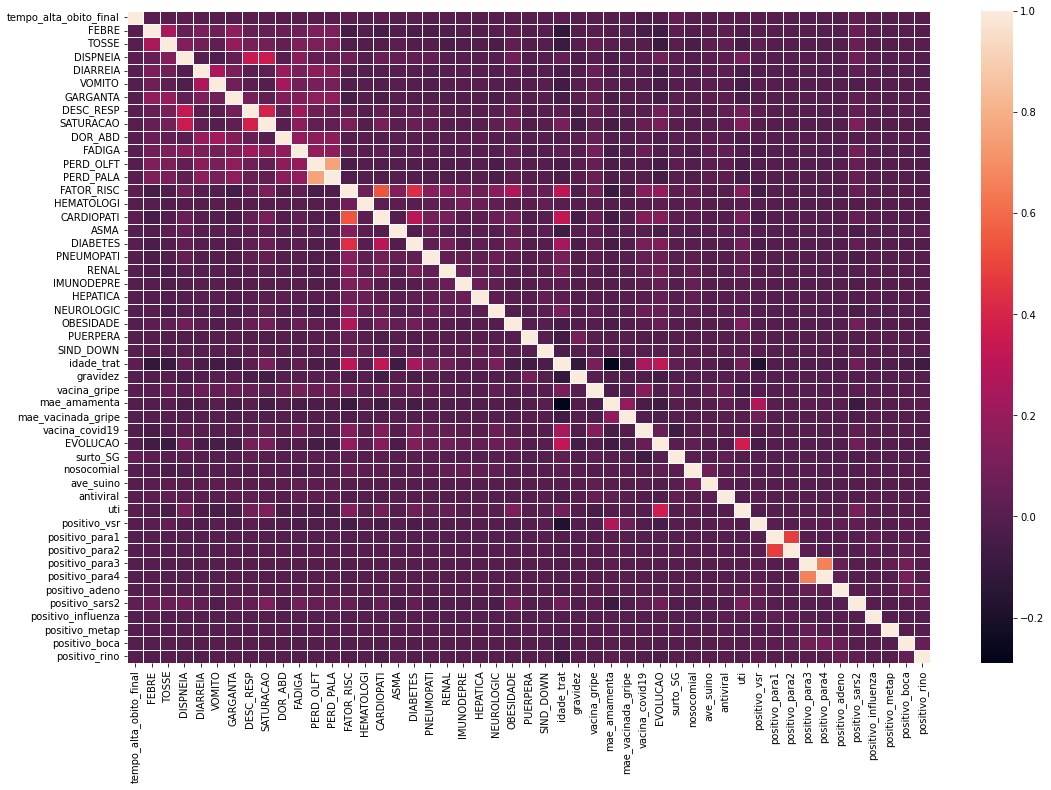

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 12))
sns.heatmap(df_2021.corr().round(2), linewidths=.5);

Perda de paladar e olfato também são correlacionadas, porém isso acontece por um motivo biológico, já que um sentido está fortemente ligado ao outro.

A variável fator de risco não será necessária para a modelagem, uma vez que todos os fatores de risco estão listados.

A variável de Síndrome Gripal também não será considerada na análise por ser redundante.